
### **Problem Statement**

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### **Details**

This data set contains 583 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records. Any patient whose age exceeded 89 is listed as being of age "90".

### **Columns:**

• Age of the patient • Gender of the patient • Total Bilirubin • Direct Bilirubin • Alkaline Phosphotase • Alamine Aminotransferase • Aspartate Aminotransferase • Total Protiens • Albumin • Albumin and Globulin Ratio • Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

### **Objective:**
The primary goal is to visualize the data and establish trends or important characteristics, if any. The next important objective is to create a pycaret model that can predict the class of the patient by the virtue of its input.

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# pycaret library

In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 68.6 MB/s eta 0:00:00


In [3]:
import pycaret

In [5]:
from pycaret.datasets import get_data
dataset = pd.read_csv('/content/indian_liver_patient.csv')
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
dataset.shape

(583, 11)

In [7]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
# splitting the data into training and test
# training data
data = dataset.sample(frac=0.90, random_state=1).reset_index(drop=True)
# test data
data_unseen = dataset.drop(data.index).reset_index(drop=True)

In [10]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
520,45,Male,1.7,0.8,315,12,38,6.3,2.1,0.5,1
521,50,Male,4.2,2.3,450,69,50,7.0,3.0,0.7,1
522,50,Female,1.0,0.5,239,16,39,7.5,3.7,0.9,1
523,55,Male,75.0,3.6,332,40,66,6.2,2.5,0.6,1
524,45,Female,0.7,0.2,153,41,42,4.5,2.2,0.9,2


In [11]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median())

In [12]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [13]:
data['Gender'] = data['Gender'].astype('category')
data['Gender'] = data['Gender'].cat.codes

In [14]:
print("Data for Modeling :" + str(data.shape))
print("###########"*10)
print("Unseen Data for Prediction :" + str(data_unseen.shape))

Data for Modeling :(525, 11)
##############################################################################################################
Unseen Data for Prediction :(58, 11)


In [15]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.3

In [24]:
from pycaret.classification import *

In [25]:
exp_clf101 = setup(data=data, target='Dataset' , session_id=123)

,Description,Value
0,Session id,123
1,Target,Dataset
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(525, 11)"
5,Transformed data shape,"(525, 11)"
6,Transformed train set shape,"(367, 11)"
7,Transformed test set shape,"(158, 11)"
8,Numeric features,10
9,Preprocess,True


In [26]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7410,0.7851,0.3809,0.5275,0.4337,0.2832,0.2894,0.1860
lightgbm,Light Gradient Boosting Machine,0.7303,0.7578,0.4555,0.5182,0.4702,0.2974,0.3042,0.3240
rf,Random Forest Classifier,0.7274,0.7680,0.3091,0.5242,0.3836,0.2258,0.2407,0.1750
gbc,Gradient Boosting Classifier,0.7252,0.7375,0.3882,0.5185,0.4370,0.2641,0.2712,0.1160
dummy,Dummy Classifier,0.7194,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0790
xgboost,Extreme Gradient Boosting,0.7140,0.7486,0.4073,0.4858,0.4328,0.2493,0.2544,0.0970
ridge,Ridge Classifier,0.7139,0.0000,0.0000,0.0000,0.0000,-0.0105,-0.0213,0.0450
lr,Logistic Regression,0.7084,0.7362,0.1655,0.4533,0.2363,0.1044,0.1263,0.2840
lda,Linear Discriminant Analysis,0.7057,0.7125,0.0200,0.1000,0.0333,-0.0085,-0.0207,0.0530
svm,SVM - Linear Kernel,0.7029,0.0000,0.1273,0.1917,0.1428,0.0562,0.0532,0.0790


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [27]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7027,0.6667,0.1000,0.3333,0.1538,0.0333,0.0422
1,0.7838,0.7889,0.4000,0.6667,0.5000,0.3729,0.3927
2,0.7027,0.6741,0.1000,0.3333,0.1538,0.0333,0.0422
3,0.6486,0.5481,0.1000,0.2000,0.1333,-0.0571,-0.0625
4,0.7568,0.8427,0.1818,1.0000,0.3077,0.2380,0.3675
5,0.6216,0.7622,0.0000,0.0000,0.0000,-0.1460,-0.1932
6,0.7568,0.9021,0.2727,0.7500,0.4000,0.2869,0.3448
7,0.6667,0.7269,0.1000,0.2500,0.1429,-0.0189,-0.0219
8,0.7222,0.7038,0.2000,0.5000,0.2857,0.1509,0.1754


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7568,0.7963,0.3000,0.6000,0.4000,0.2681,0.2935
1,0.8378,0.8981,0.7000,0.7000,0.7000,0.5889,0.5889
2,0.6486,0.7093,0.3000,0.3333,0.3158,0.0803,0.0805
3,0.7297,0.7444,0.5000,0.5000,0.5000,0.3148,0.3148
4,0.7838,0.8304,0.3636,0.8000,0.5000,0.3859,0.4348
5,0.8378,0.8741,0.5455,0.8571,0.6667,0.5664,0.5917
6,0.6486,0.7640,0.0000,0.0000,0.0000,-0.1007,-0.1555
7,0.7222,0.7481,0.3000,0.5000,0.3750,0.2105,0.2219
8,0.6944,0.6827,0.3000,0.4286,0.3529,0.1610,0.1654


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [34]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7297,0.6704,0.1000,0.5000,0.1667,0.0842,0.1237
1,0.7297,0.7556,0.2000,0.5000,0.2857,0.1553,0.1801
2,0.7297,0.6963,0.2000,0.5000,0.2857,0.1553,0.1801
3,0.6486,0.5444,0.1000,0.2000,0.1333,-0.0571,-0.0625
4,0.7568,0.8636,0.1818,1.0000,0.3077,0.2380,0.3675
5,0.6216,0.7797,0.0000,0.0000,0.0000,-0.1460,-0.1932
6,0.7568,0.9126,0.2727,0.7500,0.4000,0.2869,0.3448
7,0.6944,0.7231,0.1000,0.3333,0.1538,0.0294,0.0374
8,0.6667,0.6962,0.0000,0.0000,0.0000,-0.1020,-0.1504


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [35]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7297,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7297,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7297,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7297,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7027,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7027,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7027,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7222,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7222,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


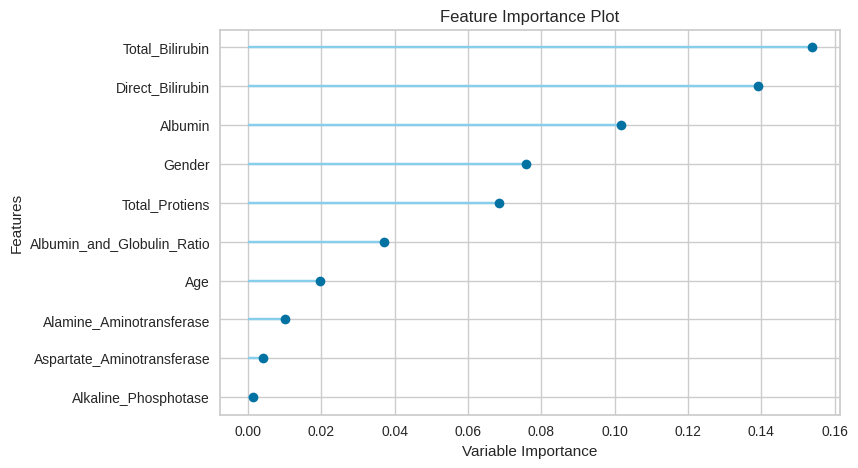

In [36]:
plot_model(tuned_lr, plot='feature')

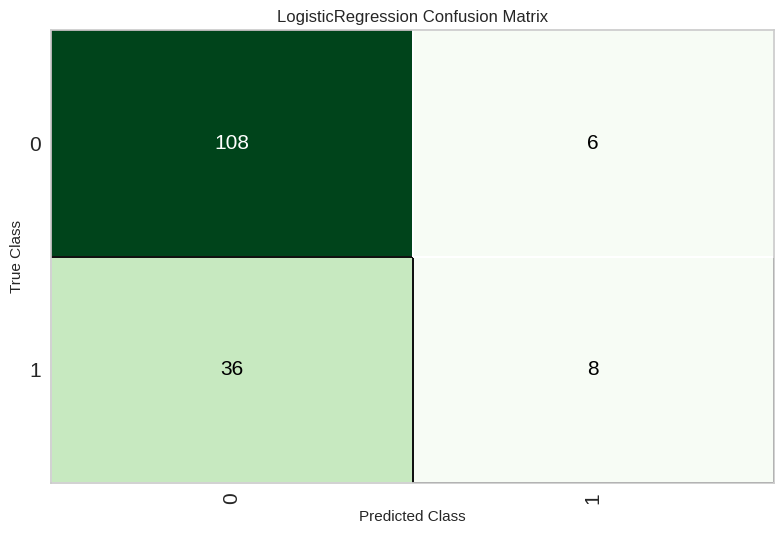

In [37]:
plot_model(tuned_lr, plot='confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

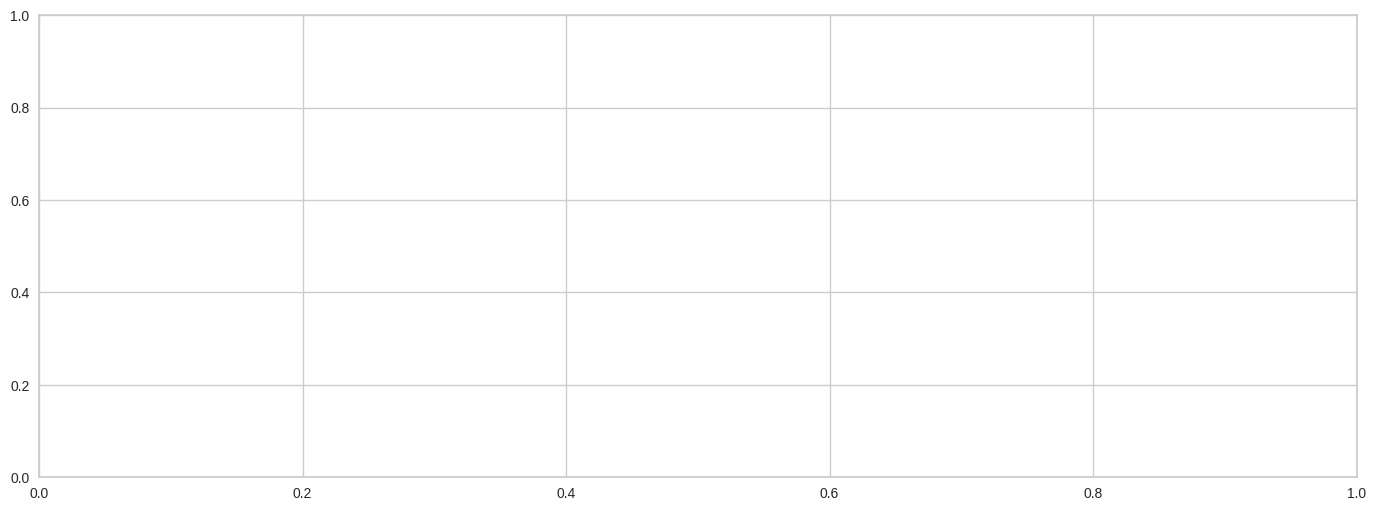

In [38]:
# Evaluate the model
evaluate_model(tuned_lr)